### 講習6 matplotlibの基本  

matplotlibはデータ可視化のためのパッケージです。
http://matplotlib.org
のページの gallery のページには膨大な数のサンプルがあり、どんなグラフを作成できるのかを見る事ができます。一度ご覧になるのをお勧めします。さらに、それぞれのサンプルコードも見る事ができます。 galleryページのサンプルは膨大なので、代表的なものだけを取り上げた次のページを見るのがまずはいいかもしれません。
http://matplotlib.org/users/screenshots.html 

ここでは、光赤外撮像データ解析によく使いそうな、ヒストグラム、等級-エラープロット、FITSデータの表示の例を紹介します。


#### inline表示
inline表示にしてやると、notebook内にグラフを表示することができます。
下のように宣言しておきます。

In [1]:
%matplotlib inline

matplotlibパッケージの中で最もよく使うモジュールはpyplotです。matplotlib.pyplot as plt の省略がよく使われます。

In [2]:
import matplotlib.pyplot as plt

#### 測光結果データをグラフ化する 

講習3で得られた測光結果、result1c.txt には、(列1) x座標、(列2)y座標、(列3) 等級、(列4)等級エラーが記されています。 
numpy.loadtxt()を用いてこのデータを読み込みます。  

In [3]:
import numpy as np

In [4]:
mlist = np.loadtxt('result1c.txt')

ndarray形式で読み込まれます。array([[x, y, 等級, 等級エラー], [x, y, 等級, 等級エラー], .... ] )  
ここでまずは欲しいのが、各星の等級と等級エラーのペアです。  
このあとグラフ作成時の分かりやすさのために、magとmerrを分けて別々の配列にしておきます。  
下のようにいくつか例を書き出してみると分かると思いますが、2番目のインデックスが2のものが等級で、2番目のインデックスが3のものが等級エラーです。

In [5]:
print (mlist[0,0], mlist[0,1], mlist[0,2], mlist[0,3])
print (mlist[1,0], mlist[1,1], mlist[1,2], mlist[1,3])
print (mlist[2,0], mlist[2,1], mlist[2,2], mlist[2,3])

1384.487 706.38 15.106 0.0301496268634
1394.061 921.854 15.921 0.0304138126515
724.86 986.57 14.02 0.0300166620396


In [6]:
mag = mlist[:, 2]
merr = mlist[:, 3]

 [:, 2]は2番目のインデックスが2のものを全て取り出すという意味です。このようにして、特定の列だけを抽出して、magおよびmerrの配列に保存しておきます。

In [7]:
mag[:10]  # 長いので最初の10コだけ抽出

array([ 15.106,  15.921,  14.02 ,  15.182,  18.2  ,  18.561,  15.943,
        19.05 ,  18.303,  18.906])

#### 光度関数のヒストグラム
まずは何も考えずに等級のヒストグラムを描いてみます。**plt.hist()**を使います。

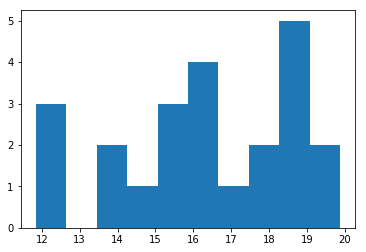

In [8]:
plt.hist(mag)
plt.show()

次に、オプションをいくつか加えてみます。

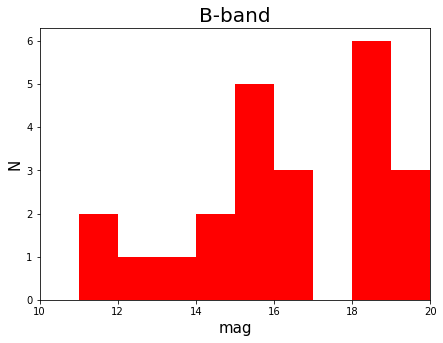

In [9]:
plt.figure(figsize=(7, 5))  #  図のサイズ 
plt.hist(mag, bins=10, range=(10,20), color='red')  # ビンの数、ヒストグラムの範囲、色を指定
plt.xlim(10, 20) # グラフのX軸の範囲
plt.title('B-band', fontsize=20)  
plt.xlabel('mag', fontsize=15)
plt.ylabel('N', fontsize=15)
plt.show()

関数でどんな引数が使えるかを調べたい時には、下のように?をおしりにつけます。

In [10]:
plt.hist?

#### 等級 vs. 等級エラープロット
まずは何も考えずにプロット。**plt.scatter()**を使います。

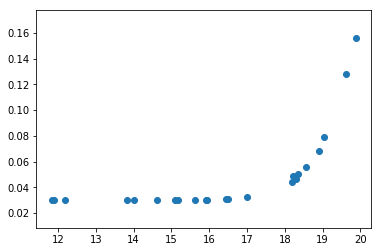

In [11]:
plt.scatter(mag, merr)
plt.show()

これも、いくつかオプションを加えてみます。

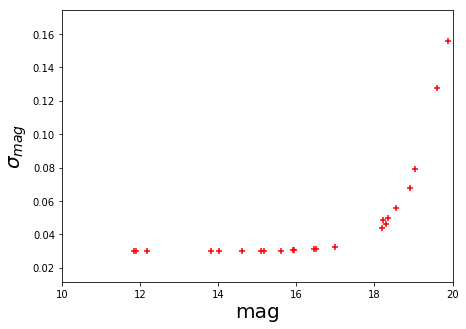

In [12]:
plt.figure(figsize=(7, 5))
plt.scatter(mag, merr, marker='+', color='red')
plt.xlim(10, 20)
plt.xlabel('mag', fontsize=20)
plt.ylabel('$\sigma_{mag}$', fontsize=20) # TeXの表記がつかえます
plt.show()

#### FITS画像の表示

FITS画像をnotebook内に表示します。  
そのためには、astropy.io.fitsでデータをndarrayとして読み込む必要があります。

In [13]:
from astropy.io import fits

In [14]:
img = fits.getdata('btarget1n5trim.fits')

IRAFで処理したFITSヘッダにはBLANKというキーワードの行が残ってしいます。するとこのような警告が出ます。ここでは無視して大丈夫です。

まずは何も考えずに表示してみます。

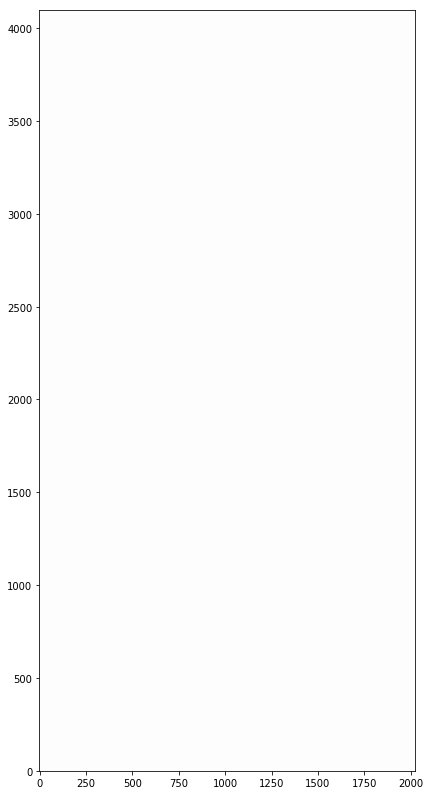

In [15]:
plt.figure(figsize=(7, 14))
plt.imshow(img, plt.cm.gray, origin='lower', interpolation='none')
plt.show()

plt.cm.grayはカラーマップです。plt.cm.[カラーの名前]で指定します。  
http://matplotlib.org/examples/color/colormaps_reference.html  
上のままではよくわかりません。表示レベルをちゃんと設定してやります。

講習3で、btarget1n5trim.fitsのバックグラウンドのメジアンが69でばらつきが7.4であることを求めました。
これをもとに表示レベルを設定します。

In [16]:
med = 69
std = 7.4

表示レベルの最小と最大(vminとvmax)をmed - std, および med + 5 stdに設定します。

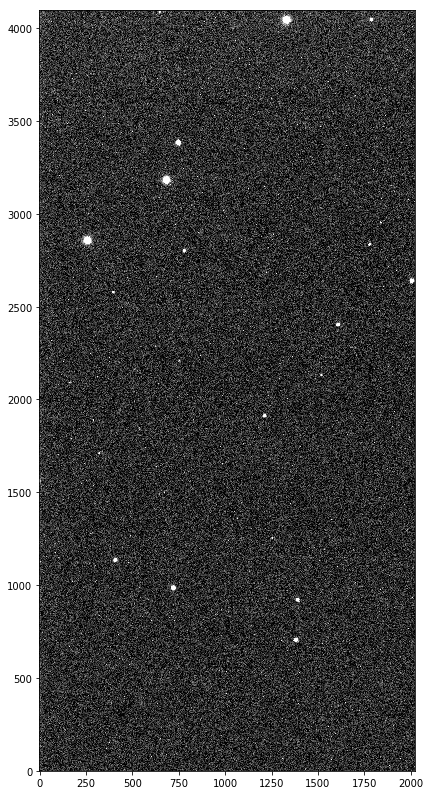

In [17]:
plt.figure(figsize=(7, 14))
plt.imshow(img, plt.cm.gray, vmin=med - std, vmax = med + 5 * std, origin='lower', interpolation='none')
plt.show()

ここに印をいれてみます。  result1c.txtの中から最初の二つの星を選んでみます。

In [18]:
! head -2 result1c.txt

1384.487 706.380 15.105999999999998 0.030149626863362672
1394.061 921.854 15.921 0.0304138126514911


原点ピクセルのXY座標は、IRAFでは(1, 1)でPythonでは(0, 0)です。なので、下では座標値から1を引いてやります。

In [21]:
xcoo = [1383.5, 1393.1]
ycoo = [705.4, 920.9]

このxcoo, ycooをplt.scatter()でオーバープロットします。   
xcoo, ycooのそれぞれの配列から順番にペアがプロットされます。等級vs等級エラーのときと同じです。  
plt.scatter()のオプションのs=100は印の円の大きさです。面積で指定します。半径を倍にしたければ値を4倍にします。

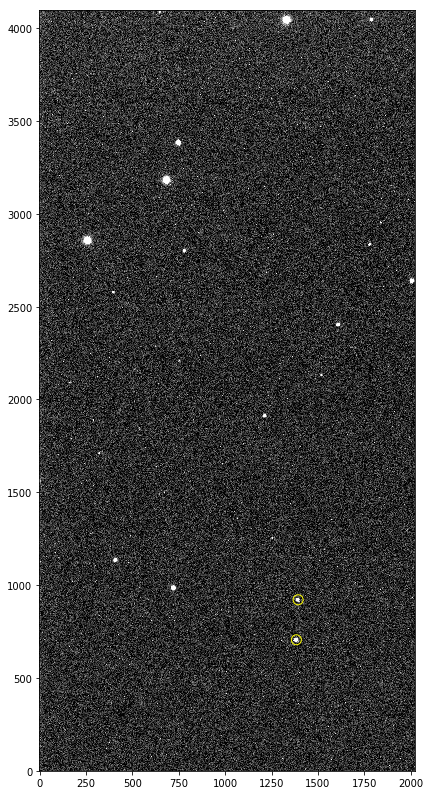

In [22]:
plt.figure(figsize=(7, 14))
plt.imshow(img, plt.cm.gray, vmin=med - std, vmax = med + 5 * std, origin='lower', interpolation='none')
plt.scatter(xcoo, ycoo, edgecolors='yellow', facecolors='none', s=100)
plt.show()

標準星の周辺だけ拡大します。plt.xlim()とplt.ylim()が加わっただけです。  
あとは、拡大したので印の大きさも変えました。

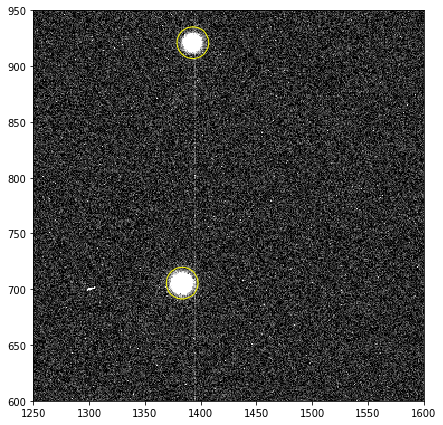

In [24]:
plt.figure(figsize=(7, 14))
plt.imshow(img, plt.cm.gray, vmin=med - std, vmax = med + 5 * std, origin='lower', interpolation='none')
plt.scatter(xcoo, ycoo, edgecolors='yellow', facecolors='none', s=1000)
plt.xlim(1250, 1600)  
plt.ylim(600, 950)
plt.show()

せっかくなので、測光した全ての星をプロットします。

In [25]:
xstar = mlist[:, 0] - 1
ystar= mlist[:, 1] -1 

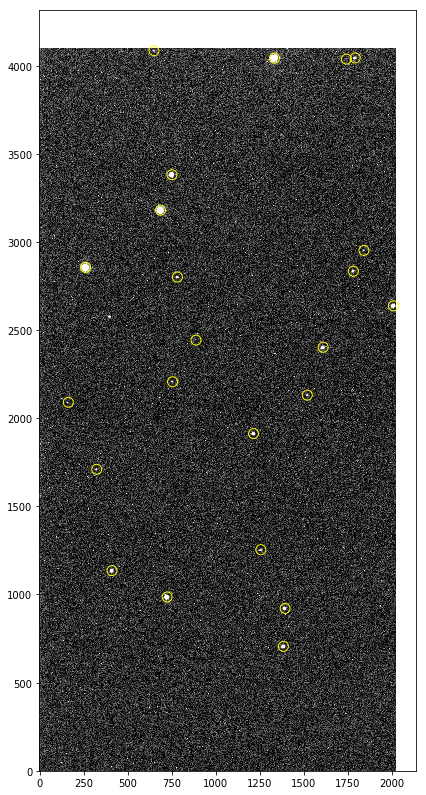

In [28]:
plt.figure(figsize=(7, 14))
plt.imshow(img, plt.cm.gray, vmin=med - std, vmax = med + 5 * std, origin='lower', interpolation='none')
plt.scatter(xstar, ystar, edgecolors='yellow', facecolors='none', s=100)
plt.show()
#plt.savefig('myfig.png')   # 上のplt.show()をコメントアウトし、この行を実行するとファイルに保存できる。

#### 演習4 

演習3で行った'btarget2n5.fits'の測光結果を用いて、  
(1) 「光度関数のヒストグラム」と 「等級vs等級エラーのプロット」を作成してください。  
(2) FITS画像をnotebookに表示して、そこに測光した星をプロットしてください。